In [3]:
# import the most useful packages
import numpy as np
import matplotlib
import math
import os
from matplotlib import pyplot as plt
import IPython.display as ipd
print('finished importing')
! pip install librosa
import librosa
import librosa.display
from google.colab import drive
drive.mount('/content/drive')

finished importing
  Using cached librosa-0.9.2-py3-none-any.whl (214 kB)
  Using cached audioread-3.0.0.tar.gz (377 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached resampy-0.4.2-py3-none-any.whl (3.1 MB)
  Using cached numba-0.56.3.tar.gz (2.4 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


Error processing line 1 of C:\Users\Shivam Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\dj-0.1-py3.11-nspkg.pth:

  Traceback (most recent call last):
    File "<frozen site>", line 186, in addpackage
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 570, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [17 lines of output]
      Error processing line 1 of C:\Users\Shivam Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\dj-0.1-py3.11-nspkg.pth:
      
        Traceback (most recent call last):
          File "<frozen site>", line 186, in addpackage
          File "<string>", line 1, in <module>
          File "<frozen importlib._bootstrap>", line 570, in module_from_spec
        AttributeError: 'NoneType' object has no attribute 'loader'
 

ModuleNotFoundError: No module named 'librosa'

In [ ]:
# make a folder for this course and this project. 
# the -p flag says make any needed parent folders and  don't complain about existing ones.
my_dir = '/content/drive/My Drive/IW_Semester2'
! mkdir -p '$my_dir'
# this command is equivalent to "cd" that sets a working directory
os.chdir(my_dir)
!ls '/content/drive/My Drive/IW_Semester2/data'

joc_recs_to_share


# **Different Sound Representations for Sample Files**

In [ ]:
# Get audio
file1 = '/content/drive/My Drive/IW_Semester2/data/joc_recs_to_share/sub12/recording_12_2_L.wav'
audio1, sample_rate1 = librosa.core.load(file1)
print(sample_rate1, audio1.shape, audio1.shape[0]/sample_rate1)
ipd.Audio(audio1, rate=sample_rate1)

file2 = '/content/drive/My Drive/IW_Semester2/data/joc_recs_to_share/sub12/recording_12_25_T.wav'
audio2, sample_rate2 = librosa.core.load(file2)
print(sample_rate2, audio2.shape, audio2.shape[0]/sample_rate2)
ipd.Audio(audio1, rate=sample_rate1)

22050 (93696,) 4.249251700680272
22050 (117248,) 5.317369614512471


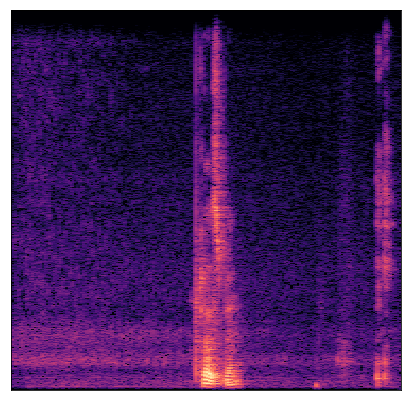

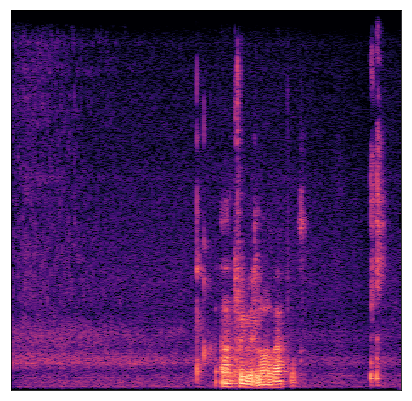

In [ ]:
# spectrograms
X = librosa.stft(audio1)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(7, 7))
librosa.display.specshow(Xdb)

X2 = librosa.stft(audio2)
Xdb2 = librosa.amplitude_to_db(abs(X2))
plt.figure(figsize=(7,7))
librosa.display.specshow(Xdb2)


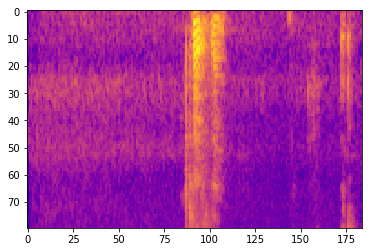

(80, 184)


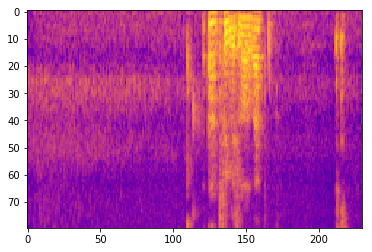

(80, 230)


In [ ]:
# mel-spectrograms
import matplotlib.cm as cm

mel1 = librosa.feature.melspectrogram(audio1, sr=sample_rate1, n_fft=1024, hop_length=512, n_mels=80, fmin=75, fmax=3700)
plt.imshow(np.log10(mel1 + 1e-10), aspect='auto', cmap=cm.plasma)
plt.show()
print(mel1.shape)

mel2 = librosa.feature.melspectrogram(audio2, sr=sample_rate2, n_fft=1024, hop_length=512, n_mels=80, fmin=75, fmax=3700)
plt.imshow(np.log10(mel2 + 1e-10), aspect='auto', cmap=cm.plasma)
plt.show()
print(mel2.shape)

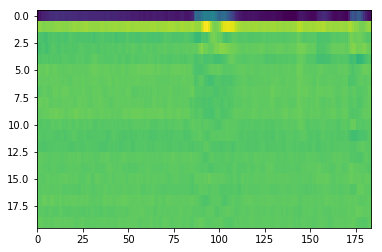

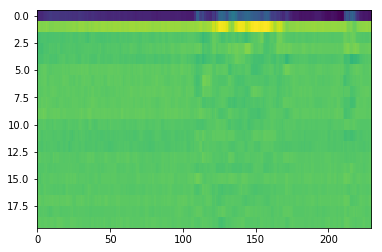

(20, 230)
117248


In [ ]:
# MFCC

mfcc = librosa.feature.mfcc(y=audio1, sr=sample_rate1, n_mfcc=20)
plt.imshow(mfcc, aspect='auto', cmap=cm.viridis)
plt.show()

mfcc = librosa.feature.mfcc(y=audio2, sr=sample_rate2, n_mfcc=20)
plt.imshow(mfcc, aspect='auto', cmap=cm.viridis)
plt.show()

print(mfcc.shape)
print(len(audio2))

def mp3tomfcc(file_path, max_pad):
  audio, sample_rate = librosa.core.load(file_path)
  mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=20)
  pad_width = max_pad - mfcc.shape[1]
  if (pad_width > 0):
    mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
  else:
    mfcc = mfcc[:,0:max_pad]
  return mfcc
  

(257, 733)
(257, 733)


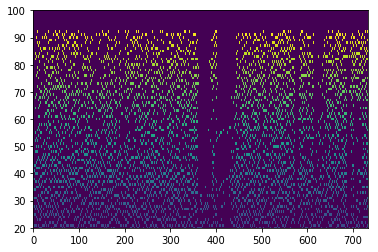

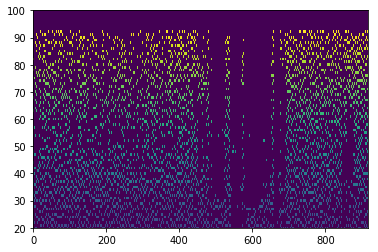

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(257, 917)


In [ ]:
# Pitch

pitch1, mag = librosa.core.piptrack(audio1, sr=sample_rate1, n_fft=512)
plt.imshow(pitch1, aspect='auto')
print(pitch1.shape)
print(mag.shape)
plt.ylim([20,100])
plt.show()

pitch2, mag = librosa.core.piptrack(audio2, sr=sample_rate2, n_fft=512)
plt.imshow(pitch2, aspect='auto')
plt.ylim([20,100])
plt.show()
print(pitch2)
print(pitch2.shape)


# Preprocessing

In [ ]:
# Compile MFCCs and extract labels: https://github.com/adhishthite/sound-mnist/blob/master/utils/wav2mfcc.py

mfccs = []
file_path = '/content/drive/My Drive/IW_Semester2/data/joc_recs_to_share/sub'
index = 0

for i in range(1,26):
  new_path = file_path + str(i)

  if os.path.exists(new_path):
    for f in os.listdir(new_path):
      if f.endswith('.wav'):
        if "p1" not in f:
          mfccs.append(mp3tomfcc(new_path + '/' + f, 1000)) 
          index = index + 1
          print(index)
          print(f)

In [ ]:
# Save all MFCCs so that don't have to recreate MFCC array every run
mfccs = np.asarray(mfccs)
print(mfccs.shape)
np.save('mfccs_all_loy_no_pad1000.npy', mfccs)
mfccs_loaded = np.load('mfccs_all_loy_no_pad1000.npy')
print(mfccs_loaded[0])


(932, 20, 1000)
[[-4.92241503e+02 -4.53617006e+02 -4.31574673e+02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 7.35398721e+01  6.78020337e+01  6.26045861e+01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.54055056e+01 -2.72134393e+01 -2.72699868e+01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-2.55981998e+00 -2.70695893e+00  2.38300456e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.05995566e+01 -1.45155872e+01 -1.01176725e+01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.76664466e+00 -2.25273180e-01 -5.36063575e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [ ]:
# Gather all labels
labels = []

file_path = '/content/drive/My Drive/IW_Semester2/data/joc_recs_to_share/sub'
index = 0
numTruth = 0
numLie = 0

for i in range(1,26):
  new_path = file_path + str(i)

  if os.path.exists(new_path):
    for f in os.listdir(new_path):
      if f.endswith('.wav'):
        label = f.split('_')[-1][0] # label is the last character after the last '_'
        
        # truth = 0; lie = 1
        if (label == 'T'):
          labels.append(0)
          numTruth = numTruth + 1
        else:
          labels.append(1)
          numLie = numLie + 1

        index = index + 1
        print(index)
        print(f)
        print(label)

print(numTruth)
print(numLie)
print(numTruth + numLie)
print(numTruth/(numTruth + numLie))

In [ ]:
from keras.utils import np_utils
from keras.utils import to_categorical
labels = to_categorical(labels, num_classes=None)
print(labels.shape)

Using TensorFlow backend.


(932, 2)


In [ ]:
# load labels into drive to avoid having to recreate labels every run
np.save('labels_all_loy.npy', labels)
labels_loaded = np.load('labels_all_loy.npy')

In [ ]:
# get pitches
def mp3topitch(file_path, max_pad1, max_pad2):
  audio, sample_rate = librosa.core.load(file_path)
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)
  print(pitch.shape)
  if (pitch.shape[0] < max_pad1):
    pad_width = max_pad1 - pitch.shape[0]
    pitch = np.pad(pitch, pad_width=((0, 0), (0, pad_width)), mode='constant')
  else: pitch = pitch[0:max_pad1]

  if (pitch.shape[1] < max_pad2):
    pad_width = max_pad2 - pitch.shape[1]
    pitch = np.pad(pitch, pad_width=((0, 0), (0, pad_width)), mode='constant')
#   else: pitch = pitch[:,0:max_pad2]
  
#   if (pitch.shape[1] != max_pad2):
#     print(pitch.shape)
  return pitch

pitches = []
file_path = '/content/drive/My Drive/IW_Semester2/data/joc_recs_to_share/sub'
index = 0
      
for i in range(1,26):
  new_path = file_path + str(i)

  if os.path.exists(new_path):
    for f in os.listdir(new_path):
      if f.endswith('.wav'):
        pitches.append(mp3topitch(new_path + '/' + f, 257, 2000)) 
        index = index + 1
        print(index)
        print(f)

In [ ]:
# load pitches into drive to avoid having to recreate pitches every run
print(len(pitches[0][0]))
pitches = np.asarray(pitches)
print(pitches.shape)
np.save('pitches_all_loy.npy', pitches)
pitches_loaded = np.load('pitches_all_loy.npy')

In [ ]:
test = mp3topitch(file2, 257, 1000)
print(test.shape)
plt.imshow(test, aspect='auto', cmap=cm.viridis)
plt.ylim([0,257])
plt.show()

# Classification

In [ ]:
## Classifier  ##

import tensorflow as tf
import IPython.display as ipd
import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.utils import to_categorical
import numpy as np 
import matplotlib
import math
import os
from matplotlib import pyplot as plt
import IPython.display as ipd
print('finished importing')
! pip install librosa
import librosa
import librosa.display
from google.colab import drive
# drive.mount('/content/drive')

# my_dir = '/content/drive/My Drive/IW06/AliceProject'
# ! mkdir -p '$my_dir'
# os.chdir(my_dir)


def get_seq_model(input_shape, num_classes):
  model = Sequential()
  model.add(LSTM(units=16, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(LSTM(units=8, dropout=0.05, recurrent_dropout=0.35, return_sequences=True))
  model.add(Flatten())
  model.add(Dense(2, activation='softmax'))
#   model.compile(optimizer=keras.optimizers.Adadelta(),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001,decay=0.0), metrics=['accuracy'])
  return model

# mfccs = np.load('mfccs_all_loy_no_pad1000.npy').tolist()
# mfccs = np.asarray(mfccs)
# labels = np.load('labels_all_loy.npy')

mfccs = np.load('mfccs_balanced_no_ps.npy').tolist()
mfccs = np.asarray(mfccs)
labels = np.load('labels_balanced_no_ps.npy')

dim_1 = mfccs.shape[1]
dim_2 = mfccs.shape[2]
channels = 1
classes = 2

X = mfccs
print(X.shape)
print(X.shape)
y = labels
# input_shape = (dim_1, dim_2, channels)
# input_shape = (dim_2, channels)
# input_shape = (dim_1, dim_2)
input_shape = (X.shape[1], X.shape[2])

finished importing
(830, 20, 1000)
(830, 20, 1000)


In [ ]:
# Import ML models from sklearn
from sklearn.linear_model import LogisticRegression # Regression classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier
from sklearn import svm # Support Vector Machine
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # Random Forest and Gradient Boosting Classifier
from sklearn.naive_bayes import MultinomialNB # Naive Bayes Classifier 
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix # Some metrics to check the performance of the models

In [ ]:
# Setting parameters for each algorithm - these are tunable to achieve max accuracy

Classifiers = {'LR':LogisticRegression(random_state=10,C=5,max_iter=200),
               'DTC':DecisionTreeClassifier(random_state=10,min_samples_leaf=2),
               'RF':RandomForestClassifier(random_state=10,n_estimators=100,n_jobs=-1),
               'GBC':GradientBoostingClassifier(random_state=10,n_estimators=400,learning_rate=0.2),
               'SGD':SGDClassifier(loss="hinge", penalty="l2"),
               'SVM':svm.SVC(kernel='linear', C=0.1, probability=True)}

In [ ]:
# reshape to 2d
nsamples, nx, ny = X.shape
X_final = X.reshape((nsamples,nx*ny))
y_final = np.argmax(y, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=1)
print(X_train.shape)
print(y_train.shape)

(581, 20000)
(581,)


In [ ]:
def print_stats(y_test, pred):
    CM = confusion_matrix(y_test,pred)
    TN, FP, FN, TP = confusion_matrix(y_test, pred).ravel()

    Accuracy = accuracy_score(y_test,pred)
    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN)
    F1 = 2 * (Precision * Recall) / (Precision + Recall)

    print('==='*20)
    print('Accuracy = '+str(Accuracy))
    print('==='*20) 
    print('Precision = '+str(Precision))
    print('==='*20) 
    print('Recall = '+str(Recall))
    print('==='*20) 
    print('F1 = '+str(F1))
    print('==='*20) 
    print(CM)

In [ ]:
# Create a pipeline so you can reuse the code
def ML_Pipeline(clf_name):
    clf = Classifiers[clf_name]
    fit = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    np.asarray(pred)
    np.save('MFCC_'+clf_name, pred)
    
    print_stats(y_test, pred)

In [ ]:
ML_Pipeline('LR')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy = 0.5140562248995983
Precision = 0.5213675213675214
Recall = 0.48412698412698413
F1 = 0.5020576131687243
[[67 56]
 [65 61]]


In [ ]:
ML_Pipeline('DTC')

Accuracy = 0.5020080321285141
Precision = 0.5083333333333333
Recall = 0.48412698412698413
F1 = 0.4959349593495935
[[64 59]
 [65 61]]


In [ ]:
ML_Pipeline('RF')

Accuracy = 0.5341365461847389
Precision = 0.5490196078431373
Recall = 0.4444444444444444
F1 = 0.49122807017543857
[[77 46]
 [70 56]]


In [ ]:
ML_Pipeline('GBC')

Accuracy = 0.5180722891566265
Precision = 0.5238095238095238
Recall = 0.5238095238095238
F1 = 0.5238095238095238
[[63 60]
 [60 66]]


In [ ]:
ML_Pipeline('SVM')
class_probabilities = Classifiers['SVM'].predict_proba(X_test)

Accuracy = 0.5180722891566265
Precision = 0.5245901639344263
Recall = 0.5079365079365079
F1 = 0.5161290322580645
[[65 58]
 [62 64]]


In [ ]:
for i in range(0,280):
  if (class_probabilities[i][0] > 0.58 or class_probabilities[i][1] > 0.58):
    print(i)

In [ ]:
ML_Pipeline('SGD')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Accuracy = 0.4819277108433735
Precision = 0.4745762711864407
Recall = 0.2222222222222222
F1 = 0.3027027027027027
[[92 31]
 [98 28]]


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=1)
model = get_seq_model(input_shape, classes)
print(X_train2.shape)
print(y_train2.shape)

history = model.fit(X_train2, y_train2, batch_size=20, epochs=15, verbose=1, validation_split=0.2)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
(581, 20, 1000)
(581, 2)
Instructions for updating:
Use tf.cast instead.
Train on 464 samples, validate on 117 samples
Epoch 1/15
464/464 [==============================] - 4s 9ms/step - loss: 0.7011 - acc: 0.5259 - val_loss: 0.7003 - val_acc: 0.5556
Epoch 2/15
464/464 [==============================] - 1s 2ms/step - loss: 0.6644 - acc: 0.6056 - val_loss: 0.7207 - val_acc: 0.4530
Epoch 3/15
464/464 [==============================] - 1s 2ms/step - loss: 0.6523 - acc: 0.6121 - val_loss: 0.6923 - val_acc: 0.5043
Epoch 4/15
464/464 [==============================] - 1s 2ms/step - loss: 0.6372 - acc: 0.6293 - val_loss: 0.6710 - val_acc: 0.5726
Epoch 5/15
464/464 [==============================] - 1s 2ms/step - loss: 0.6135 - acc: 0.6789 - val_loss: 0.7078 - val_acc: 0.5556
Epoch 6/15
464/464 [==============

In [ ]:
# evaluate model
model.evaluate(X_test, y_test, batch_size = 3, verbose = 1)



249/249 [==============================] - 0s 2ms/step


[0.8331427025687264, 0.49799197840403364]

In [ ]:
# evaluate model on training
model.evaluate(X_train, y_train, batch_size = 3, verbose = 1)


581/581 [==============================] - 1s 2ms/step


[0.4560881843229374, 0.7900172191930105]

In [ ]:

# Evaluation metrics from scikit learn

import sklearn.metrics as metrics

y_pred = model.predict(X_test).ravel()
y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)

y_true_labels = np.argmax(y_test, axis=1)

confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)
print(confusion_matrix)

[[74 49]
 [76 50]]


AUC:  0.5405396687150207


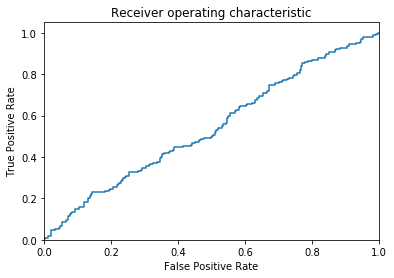

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test.ravel(), y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

print("AUC: ", roc_auc_score(y_test.ravel(), y_pred))
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

Confusion matrix, without normalization
[[74 49]
 [76 50]]


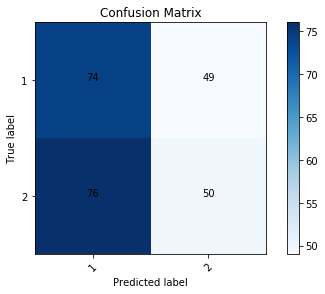

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_true_labels, y_pred_labels)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm, classes=[1, 2],
                      title='Confusion Matrix')

In [ ]:
# save LSTM predictions

y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
print(y_pred_labels)
np.save("LSTM.npy",y_pred_labels)

[1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1
 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0
 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1
 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1]


# Ensembling Classifiers

In [ ]:
# prepare features for ensemble learning; concatenate predictions from all classifiers

# LR = np.load('LR.npy').tolist()
# DTC = np.load('DTC.npy').tolist()
RF = np.load('MFCC_RF.npy').tolist()
GBC = np.load('MFCC_GBC.npy').tolist()
# SGD = np.load('SGD.npy').tolist()
SVM = np.load('MFCC_SVM.npy').tolist()
# LSTM = np.load('LSTM.npy').tolist()

# arr = np.array((LR,DTC,RF,GBC,SGD,SVM,LSTM))

arr = np.array((RF,GBC,SVM))

combined_features = arr.T
print(combined_features)
print(combined_features.shape)


[[0 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [0 1 0]
 [0 0 1]
 [1 1 0]
 [0 0 1]
 [0 0 0]
 [0 0 0]
 [0 0 1]
 [1 1 1]
 [1 1 1]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [1 0 1]
 [1 1 0]
 [0 1 1]
 [0 0 0]
 [1 1 1]
 [0 1 1]
 [1 1 1]
 [0 0 0]
 [0 0 0]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 1 1]
 [0 1 0]
 [1 1 1]
 [0 0 0]
 [0 0 0]
 [1 1 1]
 [0 0 1]
 [1 1 1]
 [0 1 1]
 [0 0 1]
 [0 0 0]
 [1 0 1]
 [1 1 0]
 [0 0 0]
 [0 1 0]
 [0 0 0]
 [0 0 0]
 [0 1 1]
 [0 0 0]
 [1 1 0]
 [0 1 0]
 [0 0 1]
 [1 1 1]
 [0 0 0]
 [1 1 1]
 [1 1 0]
 [0 1 0]
 [1 1 1]
 [1 1 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 0]
 [0 0 0]
 [0 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]
 [0 1 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]
 [1 1 0]
 [0 1 1]
 [1 1 1]
 [0 0 0]
 [1 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 1]
 [0 0 0]
 [0 1 1]
 [0 1 1]
 [0 0 0]
 [1 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 1]
 [0 1 0]
 [0 1 1]
 [0 1 0]
 [0 0 1]
 [0 0 0]
 [0 0 1]
 [1 1 1]
 [0 1 1]
 [0 0 0]
 [0 1 1]
 [1 1 0]
 [1 1 0]
 [1 0 1]
 [0 0 0]
 [0 0 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]
 [0 0 0]
 

In [ ]:
majority_pred = [-1] * 249
numtruth = 0
numlies = 0

for i in range(0,249):
  numtruth = 0
  numlies = 0
 
  for j in range(0,3):
    if (combined_features[i][j] == 0): 
      numtruth = numtruth + 1
    else:
      numlies = numlies + 1
  
  if (numtruth > numlies):
    majority_pred[i] = 0
  else:
    majority_pred[i] = 1

print(majority_pred)

[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1]


In [ ]:
print_stats(y_test,majority_pred)

Accuracy = 0.5461847389558233
Precision = 0.5546218487394958
Recall = 0.5238095238095238
F1 = 0.5387755102040817
[[70 53]
 [60 66]]


# Evaluation of Sequential Model Performance

In [ ]:
# evaluate model
model.evaluate(X_test, y_test, batch_size = 3, verbose = 1)

280/280 [==============================] - 1s 2ms/step


[0.7920200594833919, 0.464285723226411]

In [ ]:
# evaluate model on training
model.evaluate(X_train, y_train, batch_size = 3, verbose = 1)


652/652 [==============================] - 1s 2ms/step


[0.5086232373502357, 0.7760736272653188]

In [ ]:
# Evaluation metrics from scikit learn

import sklearn.metrics as metrics

y_pred = model.predict(X_test).ravel()
y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)

y_true_labels = np.argmax(y_test, axis=1)

confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)
print(confusion_matrix)


[[64 78]
 [72 66]]


In [ ]:
# More metrics (note: row, col)

# Precision (True Positive Rate)
print("Precision = ", confusion_matrix[0,0] / (confusion_matrix[0,0] + confusion_matrix[1,0]))

# Recall
print("Recall = ", confusion_matrix[1,1] / (confusion_matrix[0,1] + confusion_matrix[1,1]))

# F1

Precision =  0.47058823529411764
Recall =  0.4583333333333333


AUC:  0.47579081632653064


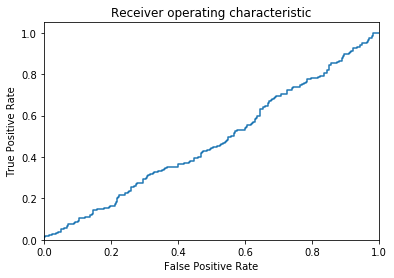

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test.ravel(), y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

print("AUC: ", roc_auc_score(y_test.ravel(), y_pred))
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()


Confusion matrix, without normalization
[[79 63]
 [79 59]]


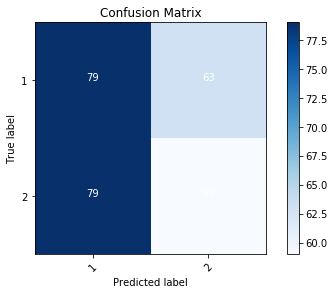

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


y_pred = model.prefrom sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_test, y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))dict(X_test).ravel()

y_true_labels = np.argmax(y_test, axis=1)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_test, y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_true_labels, y_pred_labels)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm, classes=[1, 2],
                      title='Confusion Matrix')

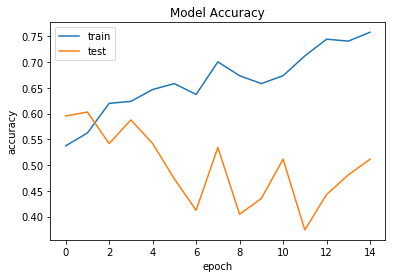

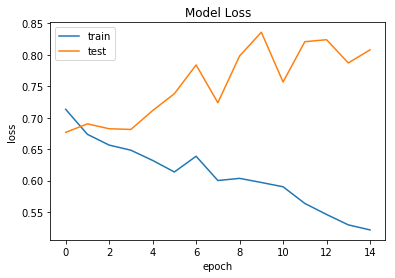

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()